# DS_Task_2

In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [9]:
train_df = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Internship\\Prodigy InfoTech\\Task 2\\titanic\\train.csv')
test_df = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Internship\\Prodigy InfoTech\\Task 2\\titanic\\test.csv')
submission = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Internship\\Prodigy InfoTech\\Task 2\\titanic\\gender_submission.csv')

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.7500,NaN,Q
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
428,429,0,3,"Flynn, Mr. James",male,NaN,0,0,364851,7.7500,NaN,Q
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S


In [13]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_df.shape

(891, 12)

In [15]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
train_df = train_df.fillna(train_df.median())

C:\Users\DELL\AppData\Local\Temp\ipykernel_13264\302783708.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df = train_df.fillna(train_df.median())


In [18]:
for column in train_df.columns:
    if train_df[column].dtype == 'object':  # Check if the column contains categorical data
        mode_val = train_df[column].mode()[0]  # Calculate the mode for categorical columns
        train_df[column].fillna(mode_val, inplace=True)

In [19]:
test_df = test_df.fillna(test_df.median())

C:\Users\DELL\AppData\Local\Temp\ipykernel_13264\987437567.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df = test_df.fillna(test_df.median())


In [20]:
for column in test_df.columns:
    if test_df[column].dtype == 'object':  # Check if the column contains categorical data
        mode_val = test_df[column].mode()[0]  # Calculate the mode for categorical columns
        test_df[column].fillna(mode_val, inplace=True)

In [21]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
surv_train_df = train_df[train_df['Survived'] == 1]
surv_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.291433,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.764425,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [28]:
train_df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13264\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_13264\1324499167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_df.corr()


<Axes: >

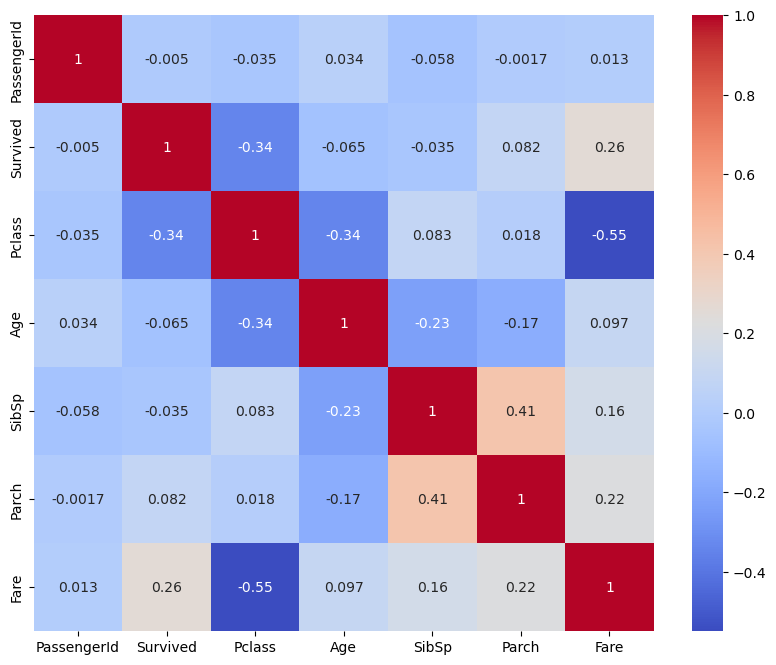

In [29]:
corr=train_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [31]:
pclass_list = train_df['Pclass'].value_counts().index.to_list()
pclass_list.sort()
surv_rate_pclass = [1, 1, 1]
for i, pclass in enumerate(pclass_list):
    surv_rate_pclass[i] = len(train_df['Pclass'][train_df['Survived'] == 1][train_df['Pclass'] == pclass]) / len(train_df['Pclass'][train_df['Pclass'] == pclass])
surv_rate_pclass = pd.DataFrame({'Pclass' : pclass_list, 'Survival Rate' : surv_rate_pclass})
surv_rate_pclass

,Pclass,Survival Rate
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
fare_surv = train_df['Fare'][train_df['Survived'] == 1].median()
fare_cas = train_df['Fare'][train_df['Survived'] == 0].median()
fare_desc = pd.DataFrame({'surv' : [0,1], 'median_fare' : [fare_cas,fare_surv]}, index = [0, 1])
fare_desc

,surv,median_fare
0,0,10.5
1,1,26.0


In [33]:
fem_surv_rate = len(train_df.loc[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')]) / len(train_df.loc[train_df['Sex'] == 'female'])
mal_surv_rate = len(train_df.loc[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')]) / len(train_df.loc[train_df['Sex'] == 'male'])
print('Female Survival Rate: ', fem_surv_rate)
print('Male Survival Rate: ', mal_surv_rate)

Female Survival Rate:  0.7420382165605095
Male Survival Rate:  0.18890814558058924


In [34]:
embarked_values = train_df['Embarked'].value_counts().index.to_list()
embarked_survival = [1, 1, 1]
for i in range(len(embarked_values)):
    surv_rate = len(train_df[(train_df['Embarked'] == embarked_values[i]) & (train_df['Survived'] == 1)]) / len(train_df[train_df['Embarked'] == embarked_values[i]])
    embarked_survival[i] = surv_rate
result = pd.DataFrame({'port': embarked_values, 'surv_rate' : embarked_survival})
print(result)

  port  surv_rate
0    S   0.339009
1    C   0.553571
2    Q   0.389610


<Axes: xlabel='port', ylabel='med_fare'>

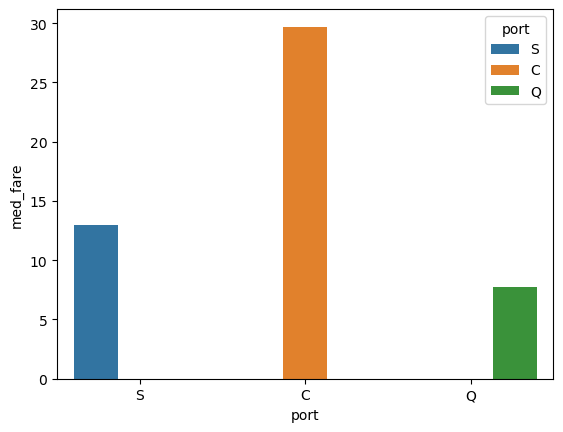

In [36]:
fare_s = train_df['Fare'][train_df['Embarked'] == 'S'].median()
fare_c = train_df['Fare'][train_df['Embarked'] == 'C'].median()
fare_q = train_df['Fare'][train_df['Embarked'] == 'Q'].median()
fare_port_data = pd.DataFrame({'med_fare' : [fare_s, fare_c, fare_q],'port' : ['S', 'C', 'Q']})
order = ['S', 'C', 'Q']
sns.barplot(data = fare_port_data, x = 'port', y = 'med_fare', hue = 'port')

<Axes: xlabel='Pclass', ylabel='Count'>

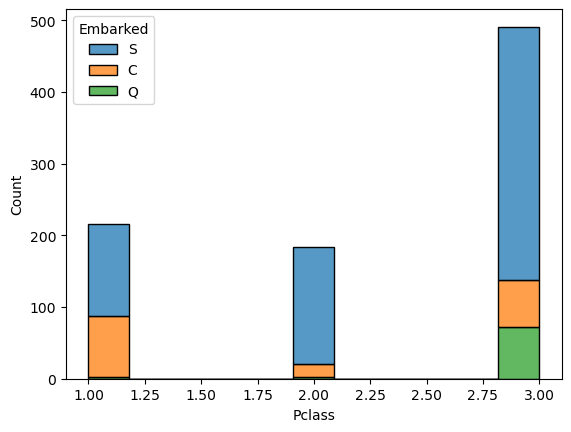

In [37]:
sns.histplot(data = train_df, x = 'Pclass', hue = 'Embarked', multiple = 'stack')

<Axes: xlabel='Age', ylabel='Count'>

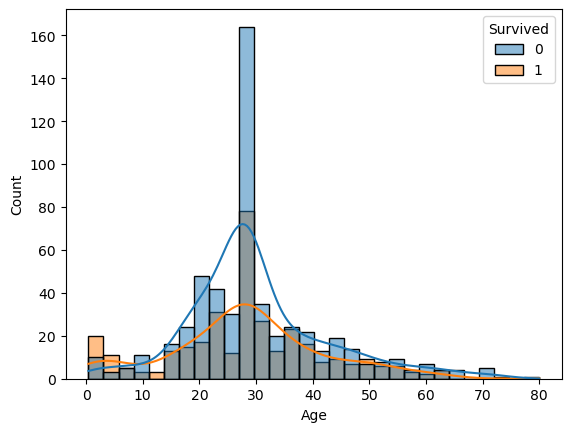

In [38]:
sns.histplot(data = train_df, x = 'Age', hue = 'Survived', kde = True, label = 'all_data')

In [39]:
age_means = train_df.groupby(['Pclass', 'Sex'])['Age'].mean()
age_means

Pclass  Sex   
1       female    33.978723
        male      38.995246
2       female    28.703947
        male      30.512315
3       female    23.572917
        male      26.911873
Name: Age, dtype: float64

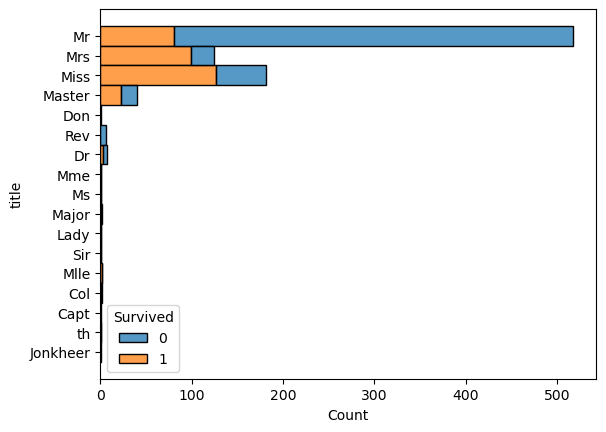

In [40]:
split_name = train_df['Name'].str.split(', ', expand = True)
title = split_name[1].str.split(". ", n = 1).str[0]
train_df['title'] = title
split_name = test_df['Name'].str.split(', ', expand = True)
title_test = split_name[1].str.split(". ", n = 1).str[0]
test_df['title'] = title_test
histplot = sns.histplot(data = train_df, y = 'title', hue = 'Survived', multiple = 'stack')

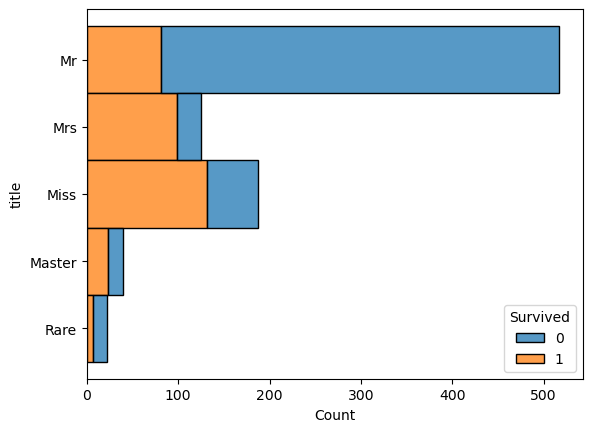

In [41]:
train_df['title'] = train_df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'th', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
test_df['title'] = test_df['title'].replace(['Dr', 'Rev', 'Major', 'Col', 'th', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare')
train_df['title'] = train_df['title'].replace(['Mlle', 'Ms', 'Lady', 'Mme', 'Dona'], 'Miss')
test_df['title'] = test_df['title'].replace(['Mlle', 'Ms', 'Lady', 'Mme', 'Dona'], 'Miss')
histplot = sns.histplot(data = train_df, y = 'title', hue = 'Survived', multiple = 'stack')


In [42]:
y = train_df['Survived']
x_train_df = train_df.drop(labels = 'Survived', axis = 1)
num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Embarked', 'title']
X_cat = pd.get_dummies(x_train_df[cat_features])
X_num = x_train_df[num_features]
X = X_cat.join(X_num)
X_cat_test = pd.get_dummies(test_df[cat_features])
X_num_test = test_df[num_features]
X_test = X_cat_test.join(X_num_test)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X, X_val, y, y_val = train_test_split(X, y, random_state = 0)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X, y)
gbc_score = gbc.score(X_val, y_val)
gbc_score

0.852017937219731

In [46]:
X.isna().sum()

Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
title_Master    0
title_Miss      0
title_Mr        0
title_Mrs       0
title_Rare      0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
dtype: int64

In [47]:
X_test.isna().sum()

Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
title_Master    0
title_Miss      0
title_Mr        0
title_Mrs       0
title_Rare      0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
dtype: int64

In [48]:
predictions = gbc.predict(X_test)

In [51]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)